# Libraries Used

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# Preprocessing

In [4]:

df2 = pd.read_csv(r"heart_attack_prediction_dataset_deleted.csv")

In [5]:
df2.isna().sum()

Patient ID                           0
Age                                231
Sex                                  0
Cholesterol                        569
Blood Pressure                       0
Heart Rate                           0
Diabetes                             0
Family History                       0
Smoking                              0
Obesity                              0
Alcohol Consumption                  0
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems              0
Medication Use                       0
Stress Level                         0
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week      0
Sleep Hours Per Day                  0
Country                              0
Continent                            0
Hemisphere                           0
Heart Attack Risk        

In [6]:
df2['Age'].mean()

53.712025316455694

In [7]:
df2['Cholesterol'].mean()


259.7263851598731

In [8]:
med_age = df2['Age'].median()

In [9]:
med_chol = df2['Cholesterol'].median()

In [10]:
df2['Age'].mode()

0    42.0
1    90.0
Name: Age, dtype: float64

In [11]:
df2['Cholesterol'].mode()

0    235.0
Name: Cholesterol, dtype: float64

In [12]:
df2_age = df2['Age'].fillna(med_age)
df2_age

0       67.0
1       21.0
2       21.0
3       54.0
4       66.0
        ... 
8758    60.0
8759    28.0
8760    47.0
8761    36.0
8762    54.0
Name: Age, Length: 8763, dtype: float64

In [13]:
df2_chol = df2['Cholesterol'].fillna(med_chol)
df2_chol

0       259.0
1       389.0
2       324.0
3       383.0
4       318.0
        ...  
8758    259.0
8759    120.0
8760    259.0
8761    259.0
8762    356.0
Name: Cholesterol, Length: 8763, dtype: float64

In [14]:
df2_added_age = df2.join(df2_age,rsuffix='_changed')

In [15]:
df2_changed = df2_added_age.join(df2_chol,rsuffix='_changed')

In [16]:
df2_new = df2_changed.drop(['Age','Cholesterol'],axis=1)
df2_new

,Patient ID,Sex,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age_changed,Cholesterol_changed
0,BMW7812,Male,158/88,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,67.0,259.0
1,CZE1114,Male,165/93,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,21.0,389.0
2,BNI9906,Female,174/99,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,21.0,324.0
3,JLN3497,Male,163/100,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,54.0,383.0
4,GFO8847,Male,91/88,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,66.0,318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,Male,94/76,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,60.0,259.0
8759,QSV6764,Female,157/102,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,28.0,120.0
8760,XKA5925,Male,161/75,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,47.0,259.0
8761,EPE6801,Male,119/67,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,36.0,259.0


In [17]:
df2_new.isna().sum()

Patient ID                         0
Sex                                0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Age_changed                        0
Cholesterol_changed                0
dtype: int64

### ----------------------------------------------------------------

# QUANTITATIVE ANALYSIS

## Quantitative analysis of bp levels for a person to have a heart attack

In [18]:
blood_pressure = df2['Blood Pressure'].to_string(index=False)
ind_bp = blood_pressure.split('\n')

ind_bp_2 = []
for i in range(len(ind_bp)):
    values = ind_bp[i].split('/')
    ind_bp_2.append(values)

ind_bp_2 = []
for i in range(len(ind_bp)):
    values = ind_bp[i].split('/')
    ind_bp_2.append(values)

sum_systolic, count_sys = 0, 0
sum_dystolic, count_dys = 0, 0

for x in range(len(ind_bp_2)):
    ind_bp_2[x][0] = int(ind_bp_2[x][0])
    ind_bp_2[x][1] = int(ind_bp_2[x][1])
    sum_systolic += ind_bp_2[x][0]
    count_sys += 1
    sum_dystolic += ind_bp_2[x][1]
    count_dys += 1

avg_sys = sum_systolic/count_sys
avg_dys = sum_dystolic/count_dys
round(avg_dys, 1)
round(avg_sys, 1)

print(f'Average BP: {int(round(avg_sys, 0))}/{int(round(avg_dys, 0))}')

Average BP: 135/85


## HEART RATES

In [19]:
counties_3=df2["Heart Rate"].unique()
varr_3=df2["Heart Rate"].groupby(df2["Country"])
mean_hr=varr_3.mean()
mean_hr=pd.DataFrame(mean_hr)
mean_hr.columns.values[0] = 'Mean'
mean_hr = mean_hr.reset_index()

# Ensure the 'Country' column is part of the DataFrame
# mean_hr['Country'] = mean_hr['Country'].astype('category')
mean_hr['Mean'] = pd.to_numeric(mean_hr['Mean'])

# Sort the DataFrame
mean_hr = mean_hr.sort_values(by=['Mean'], ascending=False)
mean_hr

,Country,Mean
13,South Africa,76.983529
6,France,76.300448
11,New Zealand,75.954023
1,Australia,75.714922
7,Germany,75.666667
5,Colombia,75.377622
4,China,75.376147
2,Brazil,75.240260
3,Canada,75.197727
0,Argentina,75.171975


## Cholesterol Rates

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

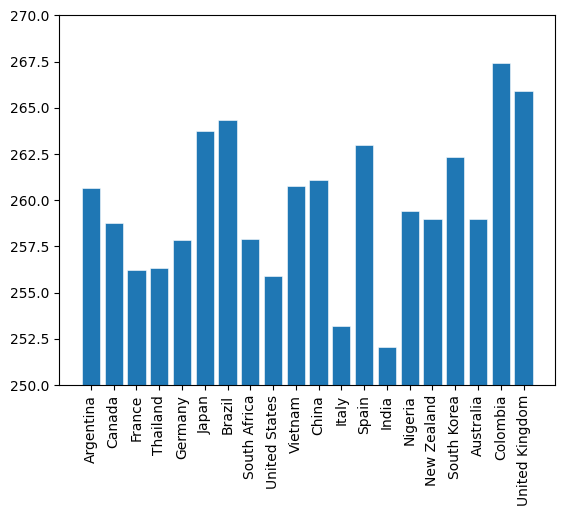

In [21]:
counties=df2["Country"].unique()
varr=df2["Cholesterol"].groupby(df2["Country"])
mean_colestrol=varr.mean()
plt.ylim(250,270)

plt.xticks(rotation=90)
fig=plt.bar( counties,mean_colestrol,label="Rotated", edgecolor="white", linewidth=0.4)

plt.show()

In [22]:

varr=df2_new["Cholesterol_changed"].groupby(df2_new["Country"])
mean_colestrol=varr.mean()
mean_colestrol=mean_colestrol.to_frame(name="Mean")
mean_colestrol=mean_colestrol.reset_index()
mean_colestrol=mean_colestrol.sort_values(by=['Mean'],ascending=False)
mean_colestrol

,Country,Mean
18,United States,266.873810
19,Vietnam,265.548235
6,France,264.004484
5,Colombia,263.351981
12,Nigeria,262.796875
16,Thailand,262.126168
10,Japan,260.995381
9,Italy,260.633411
0,Argentina,260.535032
14,South Korea,259.378973


C:\Users\swath\AppData\Local\Temp\ipykernel_5580\1958375742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = mean_colestrol, y = 'Country', x = 'Mean', palette='rocket',linewidth=1)


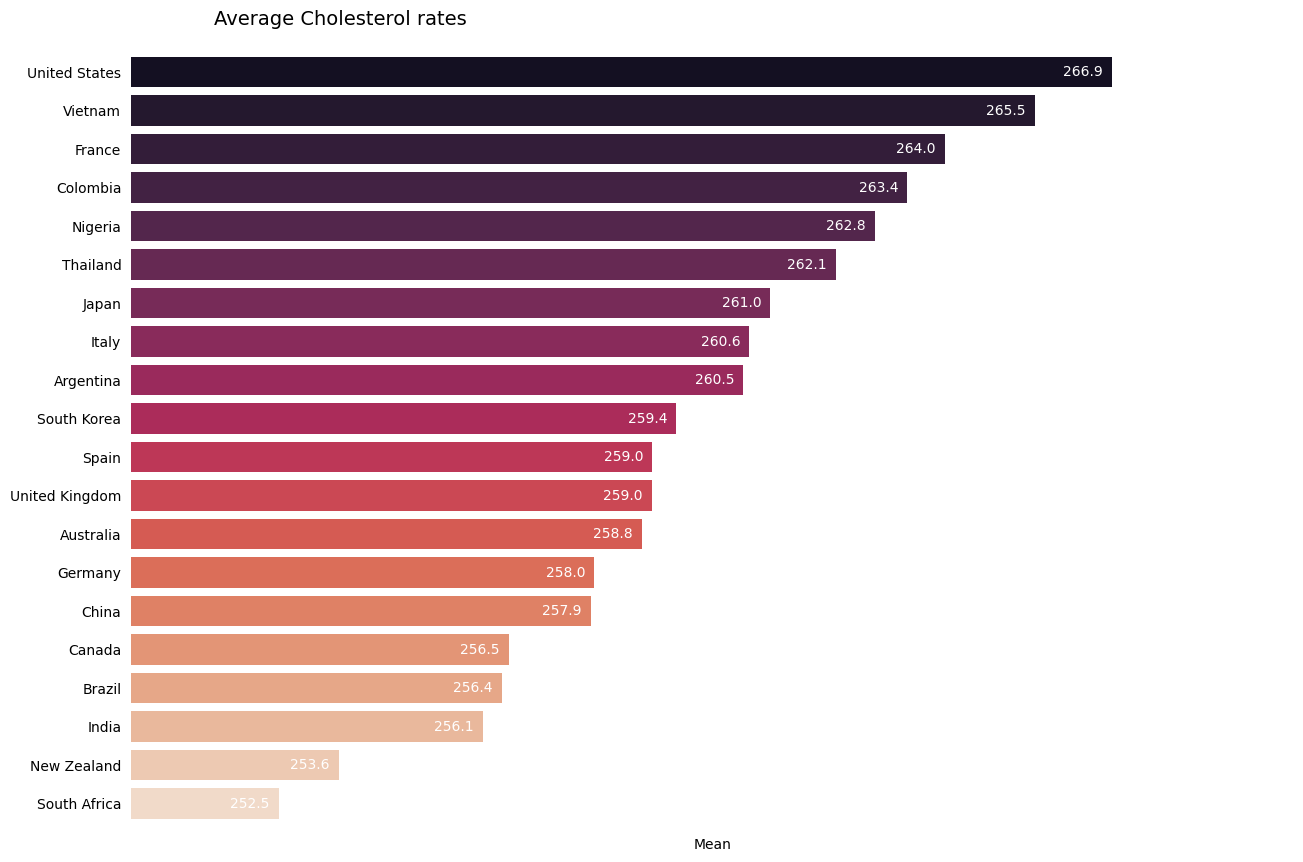

In [23]:

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.barplot(data = mean_colestrol, y = 'Country', x = 'Mean', palette='rocket',linewidth=1)
sns.despine(right = True, bottom = True, left = True)
for i in range(20):

        ax.bar_label(ax.containers[i], label_type = 'edge', color = 'white', padding = -35,fmt = '%.1f')
        plt.xlim(250,270)
        ax.tick_params(left = False, bottom = False)
    

ax.set_xticklabels([]) 
# ax.tick_params(left = False, bottom = False)
plt.xlim(250,270)

# ax.set_yticklabels(ax.get_yticklabels(), color = '#6F7378')
ax.set_ylabel('')
ax.set_title('Average Cholesterol rates', pad = 20, x = 0.18, size = 14)

plt.show()




## Choropleth

In [24]:
import plotly.express as px

fig = px.choropleth(mean_colestrol, 
                    locations="Country",
                    locationmode="country names",
                    color='Mean',
                    color_continuous_scale='YlOrRd',
                    title='Mean cholestrol'
                   )
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
            ),
            width=900,
            height=400,
    )
fig.show()

ModuleNotFoundError: No module named 'plotly'

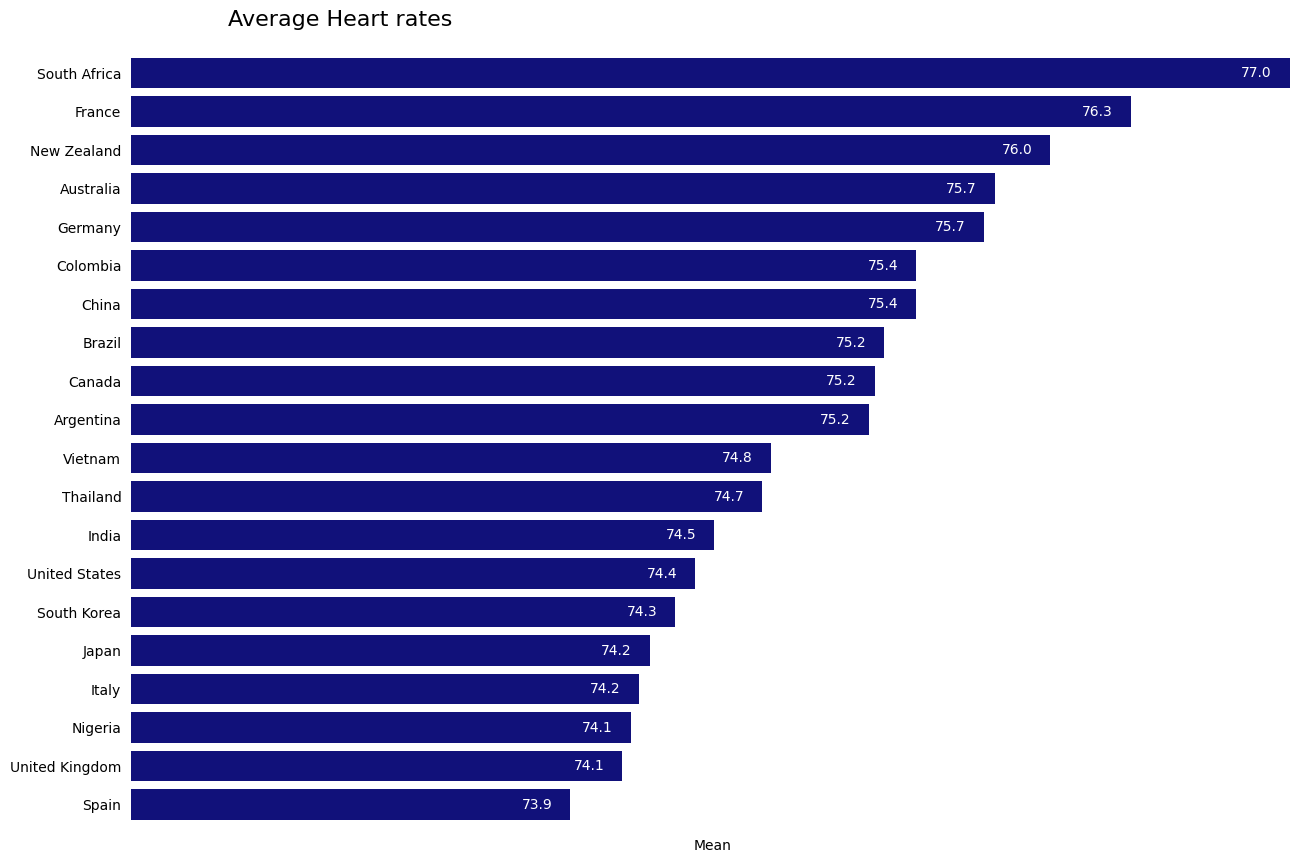

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.barplot(data = mean_hr, y = 'Country', x = 'Mean', color = 'darkblue',linewidth=1)
sns.despine(right = True, bottom = True, left = True)
barlab1 = ax1.bar_label(ax1.containers[0], label_type = 'edge', color = 'white', padding = -35,fmt = '%.1f')
ax1.set_xticklabels([]) 
ax1.tick_params(left = False, bottom = False)
plt.xlim(72,77)

ax1.set_ylabel('')
ax1.set_title('Average Heart rates', pad = 20, x = 0.18, size = 16)

plt.show()

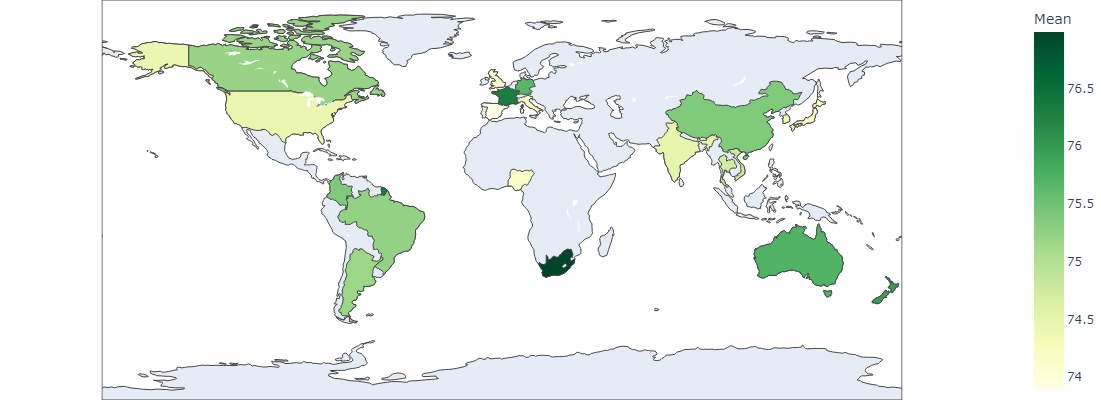

In [ ]:
import plotly.express as px

fig = px.choropleth(mean_hr, 
                    locations="Country",
                    locationmode="country names",
                    color='Mean',
                    color_continuous_scale='ylgn',
                    title='Mean cholestrol'
                   )
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
            ),
            width=900,
            height=400,
    )
fig.show()

## Tryglicerides rates

In [ ]:
counties1=df2_new["Country"].unique()
varr1=df2_new["Triglycerides"].groupby(df2_new["Country"])
mean_try= varr1.mean()
mean_try = mean_try.to_frame(name="Mean")
mean_try=mean_try.reset_index()
mean_try=mean_try.sort_values(by=['Mean'],ascending=False)
mean_try


,Country,Mean
6,France,434.237668
18,United States,434.166667
19,Vietnam,430.327059
16,Thailand,429.883178
10,Japan,426.032333
12,Nigeria,425.395089
14,South Korea,420.092910
1,Australia,419.879733
0,Argentina,419.785563
17,United Kingdom,419.601751


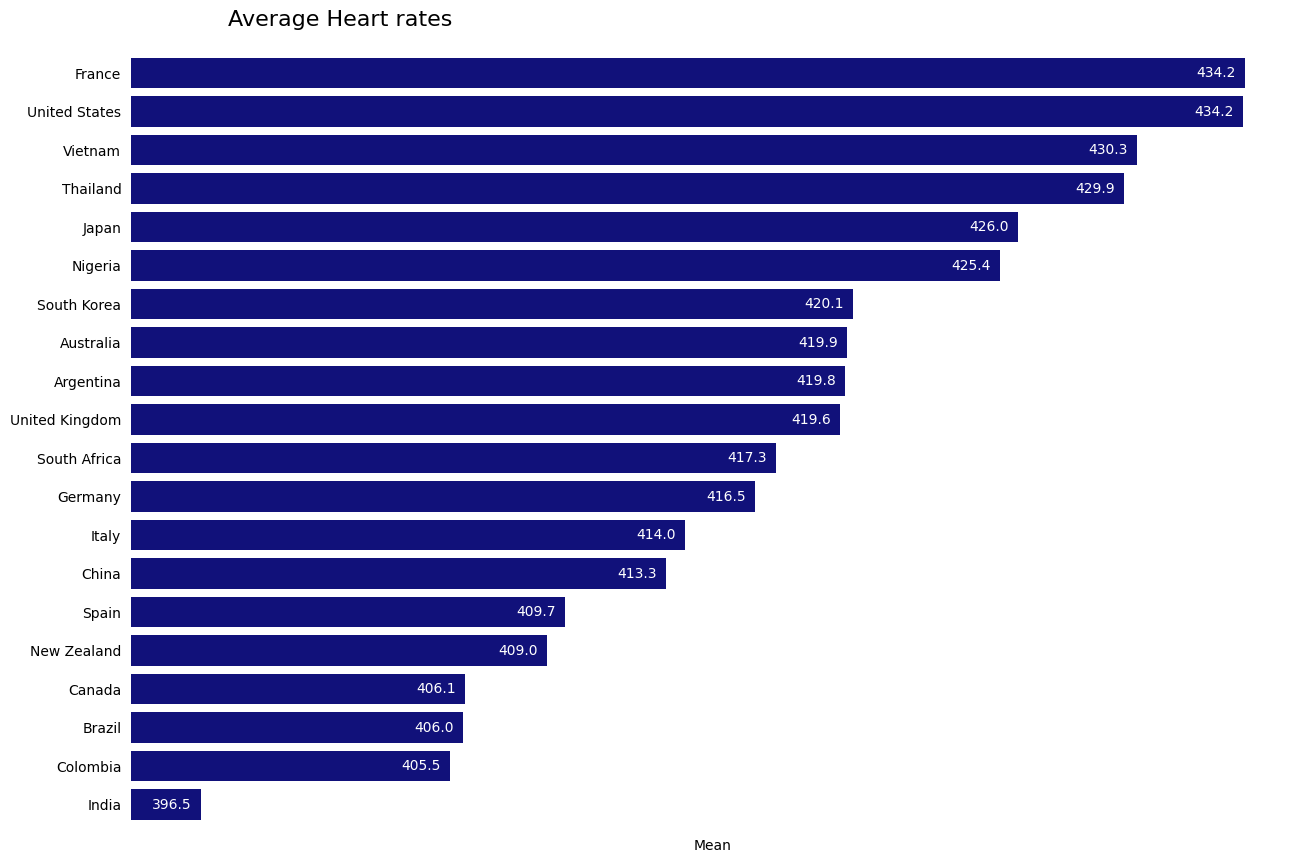

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.barplot(data = mean_try, y = 'Country', x = 'Mean', color = 'darkblue',linewidth=1)
sns.despine(right = True, bottom = True, left = True)
barlab1 = ax1.bar_label(ax1.containers[0], label_type = 'edge', color = 'white', padding = -35,fmt = '%.1f')
ax1.set_xticklabels([]) 
ax1.tick_params(left = False, bottom = False)
plt.xlim(394,436)


ax1.set_ylabel('')
ax1.set_title('Average Heart rates', pad = 20, x = 0.18, size = 16)
plt.show()

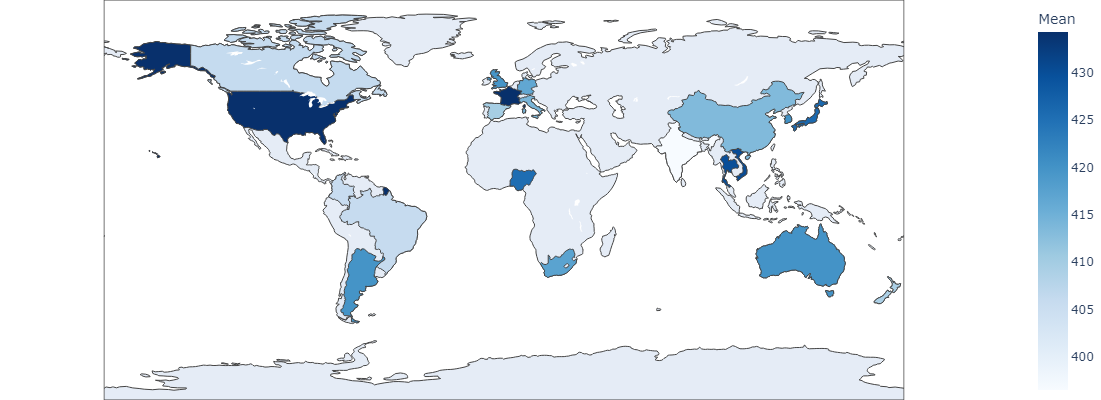

In [ ]:
import plotly.express as px

fig = px.choropleth(mean_try, 
                    locations="Country",
                    locationmode="country names",
                    color='Mean',
                    color_continuous_scale='blues',
                    title='Mean cholestrol'
                   )
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
            ),
            width=900,
            height=400,
    )
fig.show()

## Count of things

In [ ]:
print(f"Diabeties:\t\t\t\t {df2_new['Diabetes'].sum()} / 8763")
print(f"Family History:\t\t\t\t {df2_new['Family History'].sum()} / 8763")
print(f"Smokers:\t\t\t\t {df2_new['Smoking'].sum()} / 8763")
print(f"Obesity:\t\t\t\t {df2_new['Obesity'].sum()} / 8763")
print(f"Alcoholics:\t\t\t\t {df2_new['Alcohol Consumption'].sum()} / 8763")
print(f"Previous Heart Problems:\t\t {df2_new['Previous Heart Problems'].sum()} / 8763")
print(f"On medication:\t\t\t\t {df2_new['Medication Use'].sum()} / 8763")

Diabeties:				 5716 / 8763
Family History:				 4320 / 8763
Smokers:				 7859 / 8763
Obesity:				 4394 / 8763
Alcoholics:				 5241 / 8763
Previous Heart Problems:		 4345 / 8763
On medication:				 4367 / 8763


# COLUMN WISE ANALYSIS 

In [ ]:
chk1=df2_new["Patient ID"].isna().sum()
print("Number of patients without an id =",chk1)

Number of patients without an id = 0


### Question: Is there any patient with the same id?


In [ ]:
df2_new["Patient ID"].duplicated().any()

False

### Question :What is the most frequent age experiencing heart attack?


In [ ]:
modes = df2_new["Age"].mode()
mode_counts = [(mode_value, (df2_new["Age"] == mode_value).sum()) for mode_value in modes]
print('\n'.join([f"Age: {mode_value} years, Frequency: {mode_count} times" for mode_value, mode_count in mode_counts]))



Age: 54.0 years, Frequency: 357 times


In [ ]:
df2_new["Age"].value_counts()

Age
54.0    357
42.0    150
90.0    150
59.0    144
33.0    141
       ... 
39.0     98
72.0     98
75.0     98
47.0     96
51.0     78
Name: count, Length: 73, dtype: int64

### Question : Trend of Age in the given dataset

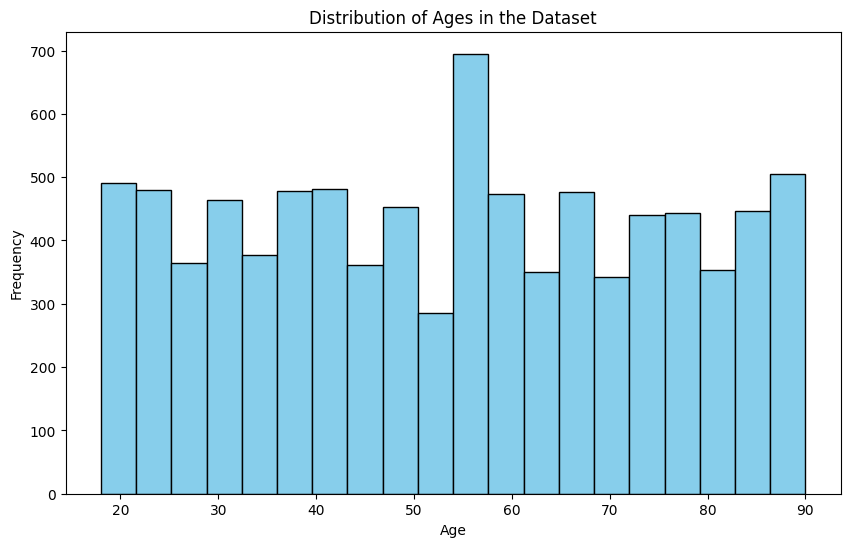

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df2_new["Age"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Ages in the Dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Question : Which Gender suffered more from heart attack?

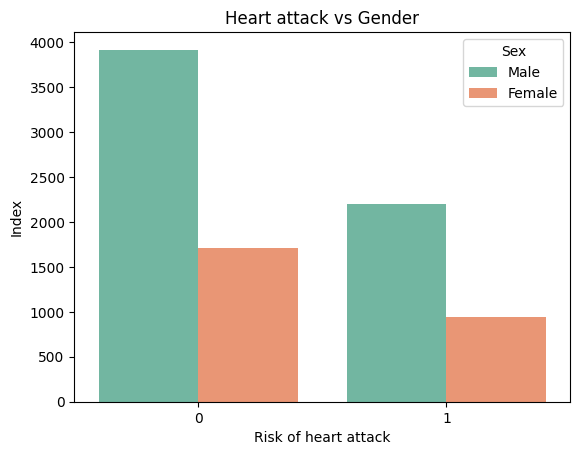

In [ ]:
import seaborn as sns
sns.countplot(x='Heart Attack Risk', hue='Sex', data=df2_new, palette='Set2')
plt.title("Heart attack vs Gender")
plt.xlabel("Risk of heart attack")
plt.ylabel("Index")
plt.show()


### Question : Outliers of cholestrol

C:\Users\swath\AppData\Local\Temp\ipykernel_4588\2980505234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_new["Cholesterol"])


<Axes: xlabel='Cholesterol', ylabel='Density'>

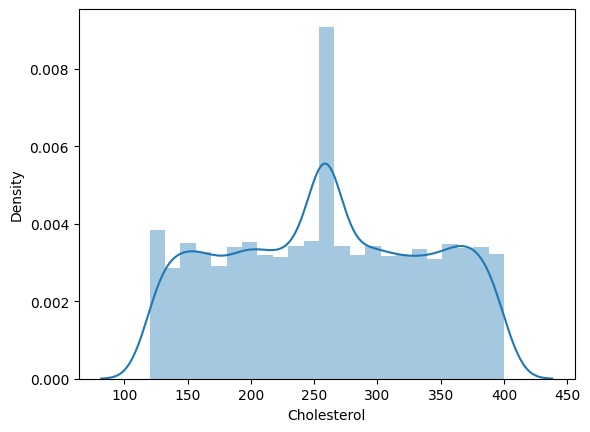

In [ ]:
import seaborn as sns
sns.distplot(df2_new["Cholesterol"])

 ### question : visualize the variablility of Heart rate

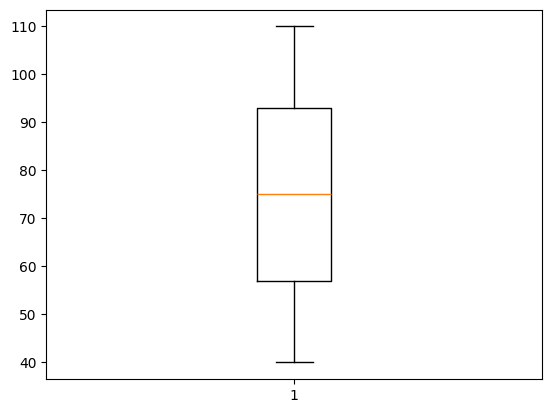

In [ ]:
plt.boxplot(df2_new["Heart Rate"])
plt.show()

### Question : What is the average sleep duration?

In [ ]:
df2_new["Sleep Hours Per Day"].mean().round(2)

7.02

### Question : What is the average  Physical Activity Per Week

In [ ]:
df2_new["Physical Activity Days Per Week"].mean().round(2)

3.49

### Question: diabities and bmi

C:\Users\swath\AppData\Local\Temp\ipykernel_4588\1082979894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes', y='BMI', data=df2_new, palette='pastel')


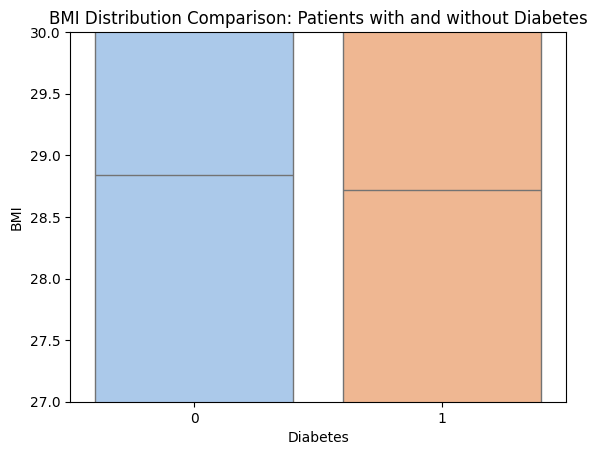

In [ ]:

sns.boxplot(x='Diabetes', y='BMI', data=df2_new, palette='pastel')
plt.title('BMI Distribution Comparison: Patients with and without Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.ylim(27,30)
plt.show()

# Heatmaps

## 1

In [ ]:
mapdata = df2_new.drop(columns=['Obesity','Alcohol Consumption','Diabetes','Sedentary Hours Per Day','Physical Activity Days Per Week','Income'])
cor = mapdata.corr(numeric_only=True)
cor

,Heart Rate,Family History,Smoking,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Age,Cholesterol
Heart Rate,1.000000,-0.013470,-0.012331,0.008276,-0.004956,0.009244,-0.004547,0.005299,0.012244,0.001811,-0.004251,-0.002082,0.000637
Family History,-0.013470,1.000000,0.011748,-0.006378,-0.004568,0.000981,0.015637,-0.011492,-0.001904,-0.011199,-0.001652,0.006922,-0.023249
Smoking,-0.012331,0.011748,1.000000,-0.000150,-0.000574,-0.010877,-0.001757,0.007670,0.004650,-0.005424,-0.004051,0.387953,0.017591
Exercise Hours Per Week,0.008276,-0.006378,-0.000150,1.000000,0.005253,-0.007119,-0.009102,0.003777,0.001717,-0.001245,0.011133,0.002570,0.019692
Previous Heart Problems,-0.004956,-0.004568,-0.000574,0.005253,1.000000,0.005336,-0.017629,0.015718,-0.019029,0.004460,0.000274,0.000634,-0.005302
Medication Use,0.009244,0.000981,-0.010877,-0.007119,0.005336,1.000000,0.000863,0.009514,-0.011095,-0.020393,0.002234,0.003779,0.000073
Stress Level,-0.004547,0.015637,-0.001757,-0.009102,-0.017629,0.000863,1.000000,-0.003250,-0.003921,-0.014205,-0.004111,0.020549,-0.019747
BMI,0.005299,-0.011492,0.007670,0.003777,0.015718,0.009514,-0.003250,1.000000,-0.005964,-0.010030,0.000020,-0.003035,0.018281
Triglycerides,0.012244,-0.001904,0.004650,0.001717,-0.019029,-0.011095,-0.003921,-0.005964,1.000000,-0.029216,0.010471,0.004139,-0.004788
Sleep Hours Per Day,0.001811,-0.011199,-0.005424,-0.001245,0.004460,-0.020393,-0.014205,-0.010030,-0.029216,1.000000,-0.018528,-0.005808,0.013740


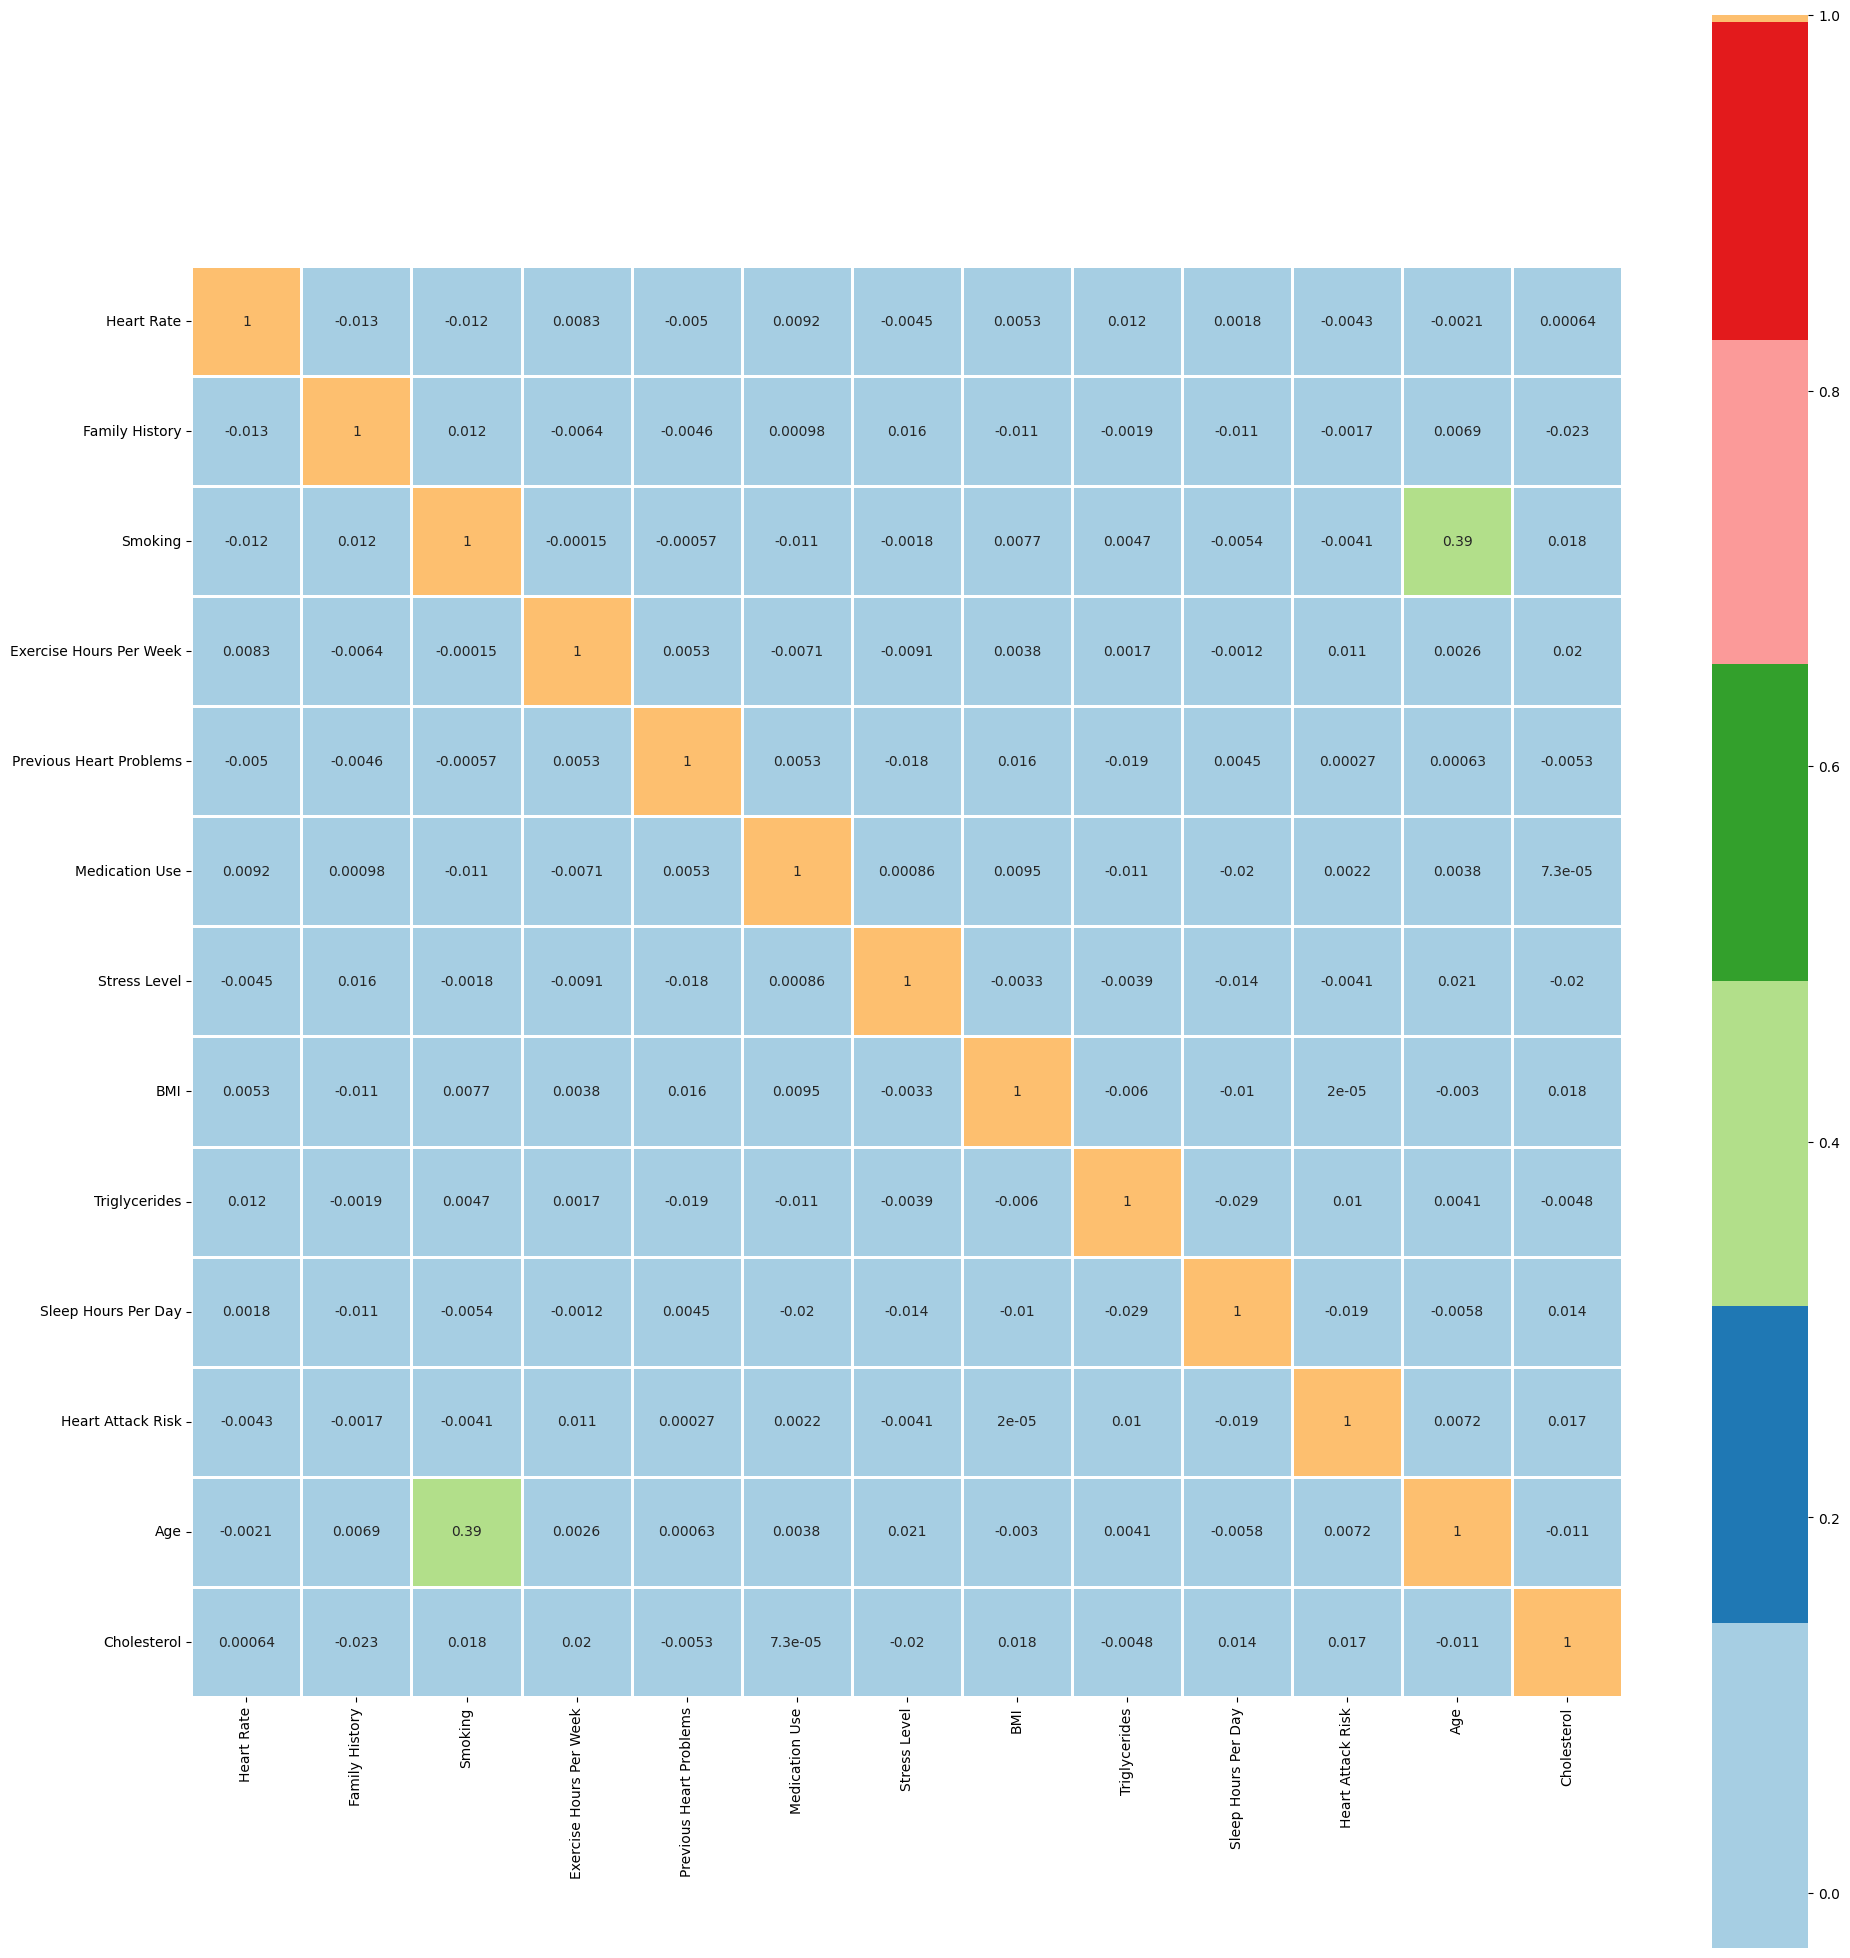

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap='Paired',linewidths=2,center=True,square=True)
plt.tight_layout()
plt.show()

as you grow older, you are more likely to smoke

## 2-1

In [ ]:
mapd1 = df2_new[['Heart Attack Risk','Obesity']]
cor1 = mapd1.corr(numeric_only=True)
cor1

,Heart Attack Risk,Obesity
Heart Attack Risk,1.000000,-0.013318
Obesity,-0.013318,1.000000


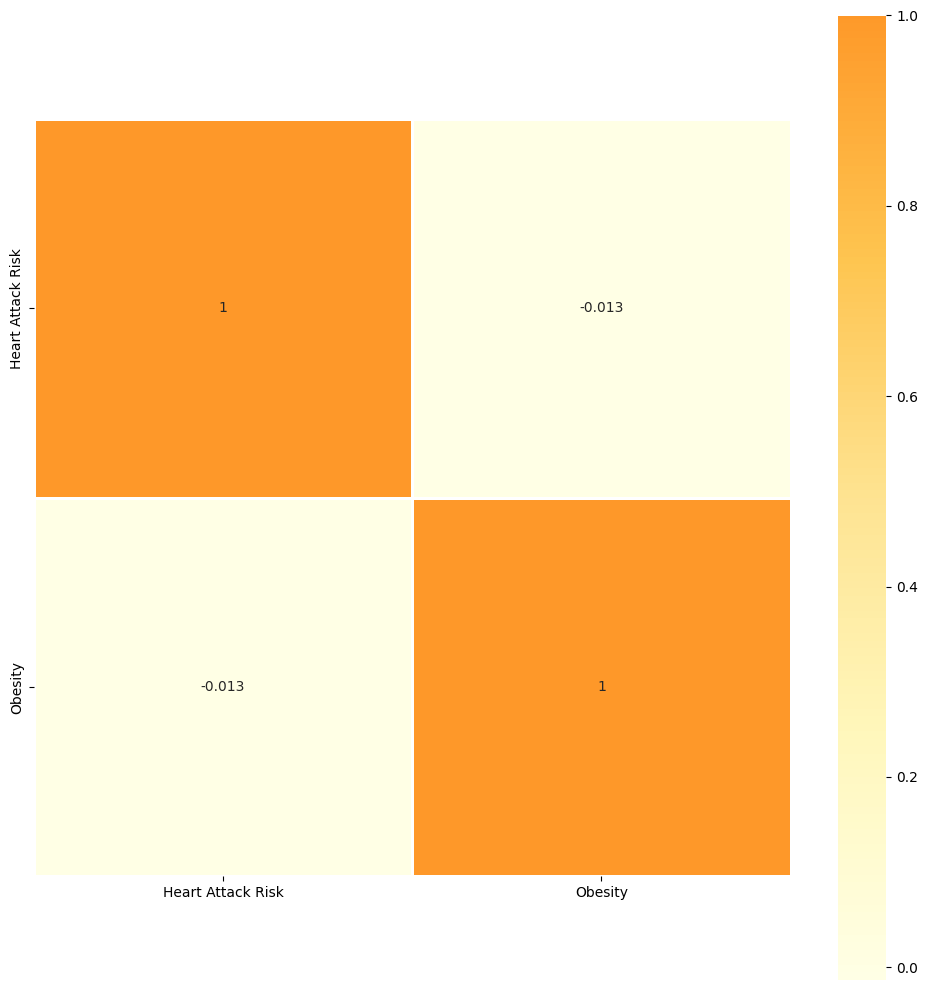

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor1,annot=True,cmap='YlOrBr',linewidths=2,center=True,square=True)
plt.tight_layout()
plt.show()

## 2-2

In [ ]:
mapd2 = df2_new[['Heart Attack Risk','Alcohol Consumption']]
cor2 = mapd2.corr(numeric_only=True)
cor2

,Heart Attack Risk,Alcohol Consumption
Heart Attack Risk,1.000000,-0.013778
Alcohol Consumption,-0.013778,1.000000


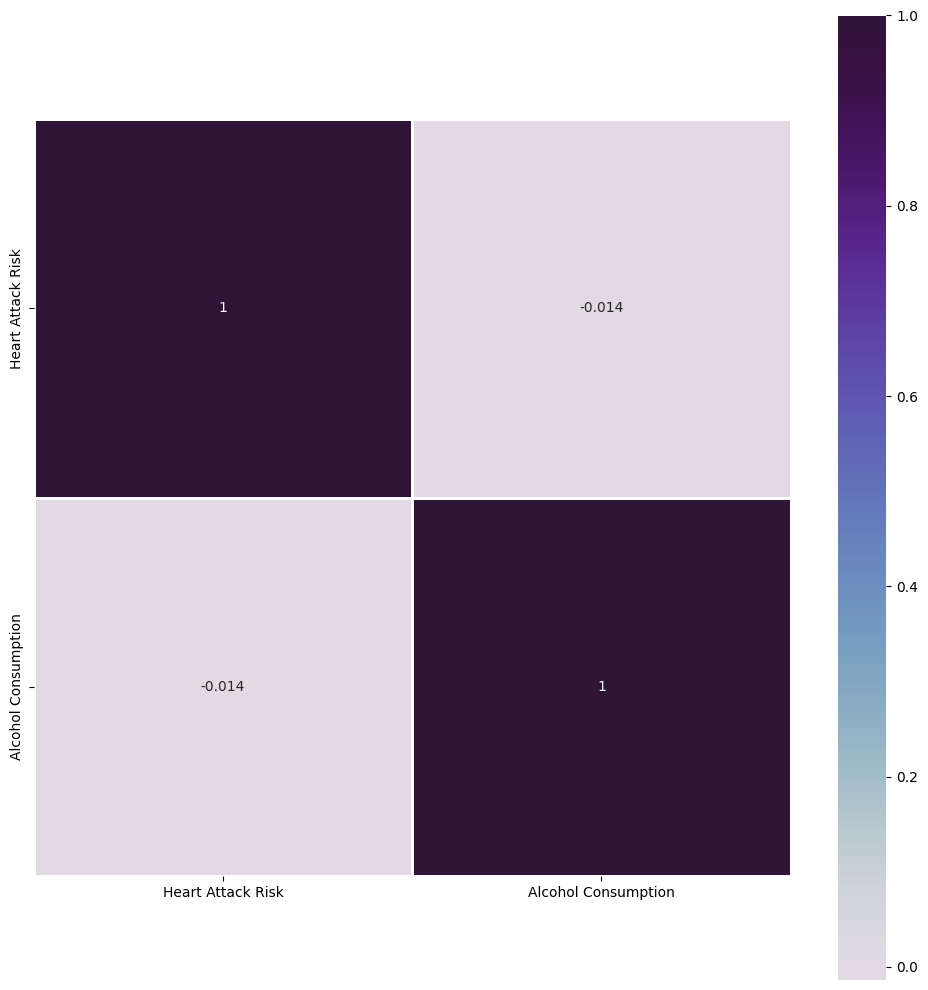

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor2,annot=True,cmap='twilight',linewidths=2,center=True,square=True)
plt.tight_layout()
plt.show()

## 2-3

In [ ]:
mapd3 = df2_new[['Heart Attack Risk','Diabetes']]
cor3 = mapd3.corr(numeric_only=True)
cor3

,Heart Attack Risk,Diabetes
Heart Attack Risk,1.000000,0.017225
Diabetes,0.017225,1.000000


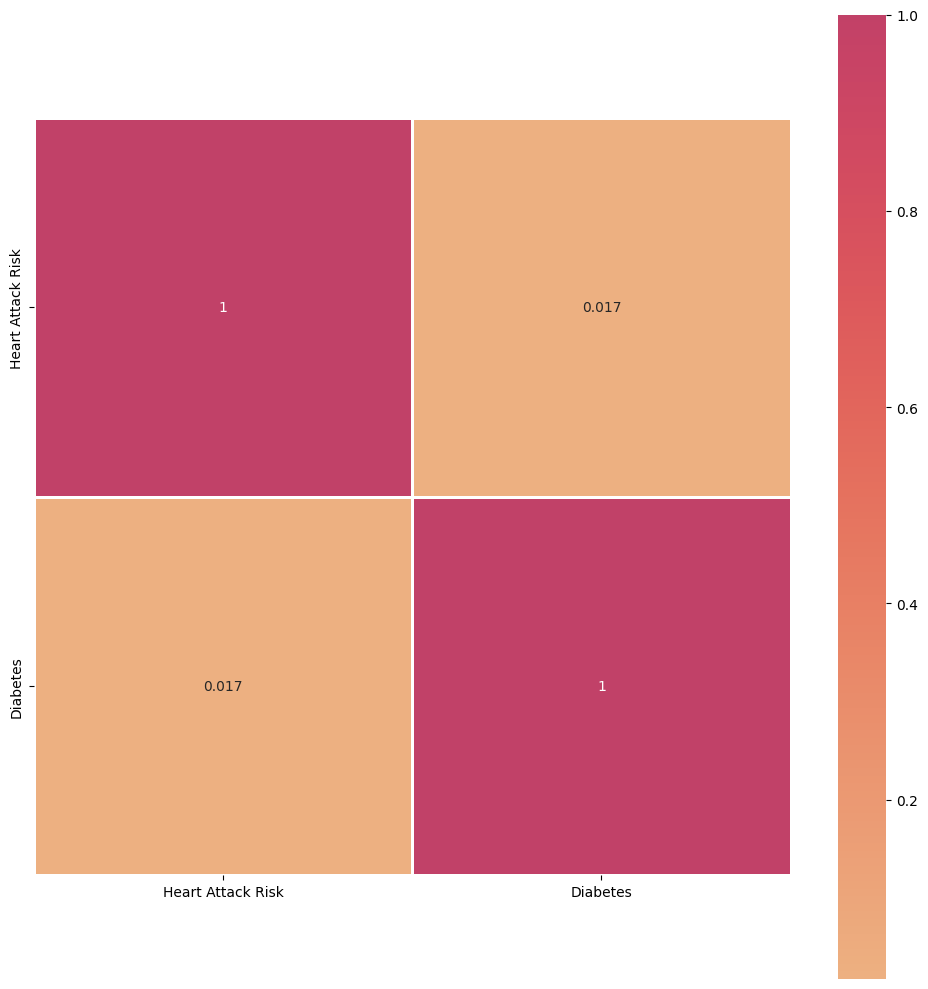

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor3,annot=True,cmap='flare',linewidths=2,center=True,square=True)
plt.tight_layout()
plt.show()

## 2-4

In [ ]:
mapd4 = df2_new[['Heart Attack Risk','Sedentary Hours Per Day']]
cor4 = mapd4.corr(numeric_only=True)
cor4

,Heart Attack Risk,Sedentary Hours Per Day
Heart Attack Risk,1.000000,-0.005613
Sedentary Hours Per Day,-0.005613,1.000000


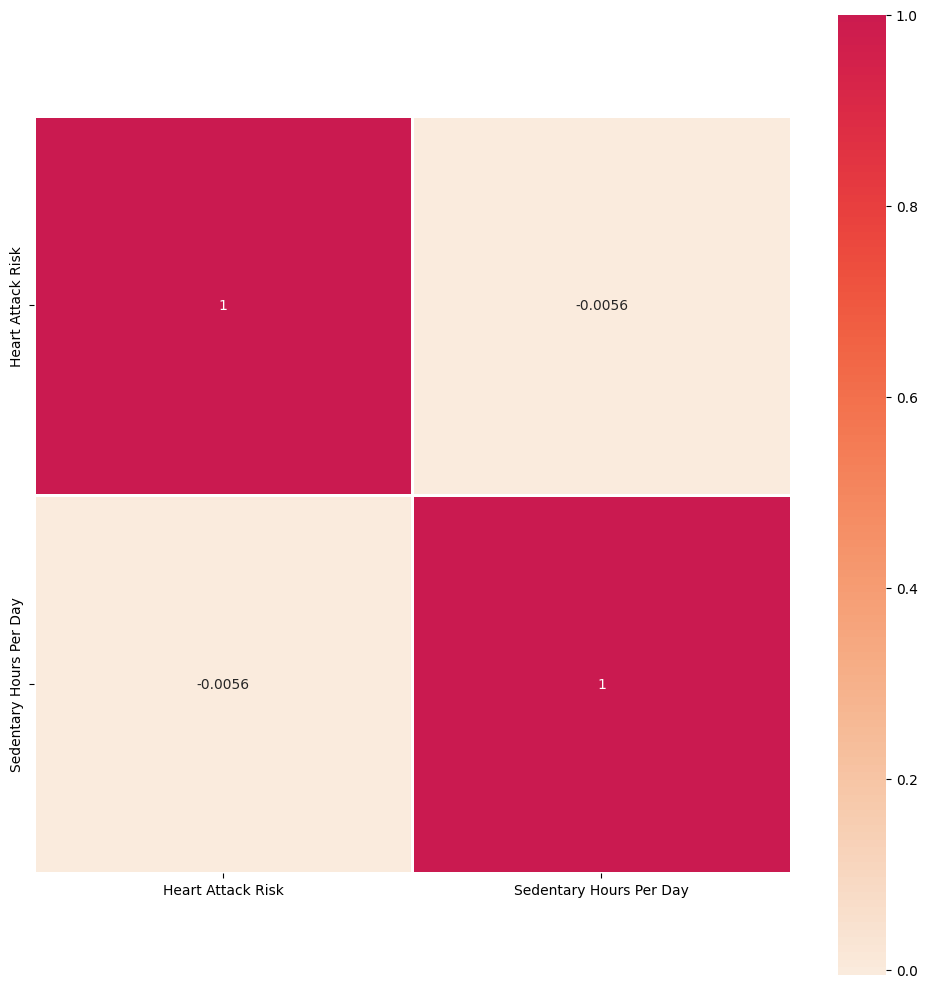

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor4,annot=True,cmap="rocket_r",linewidths=2,center=True,square=True)
plt.tight_layout()
plt.show()

## 2-5

In [ ]:
mapd5 = df2_new[['Heart Attack Risk','Physical Activity Days Per Week']]
cor5 = mapd5.corr(numeric_only=True)
cor5

,Heart Attack Risk,Physical Activity Days Per Week
Heart Attack Risk,1.000000,-0.005014
Physical Activity Days Per Week,-0.005014,1.000000


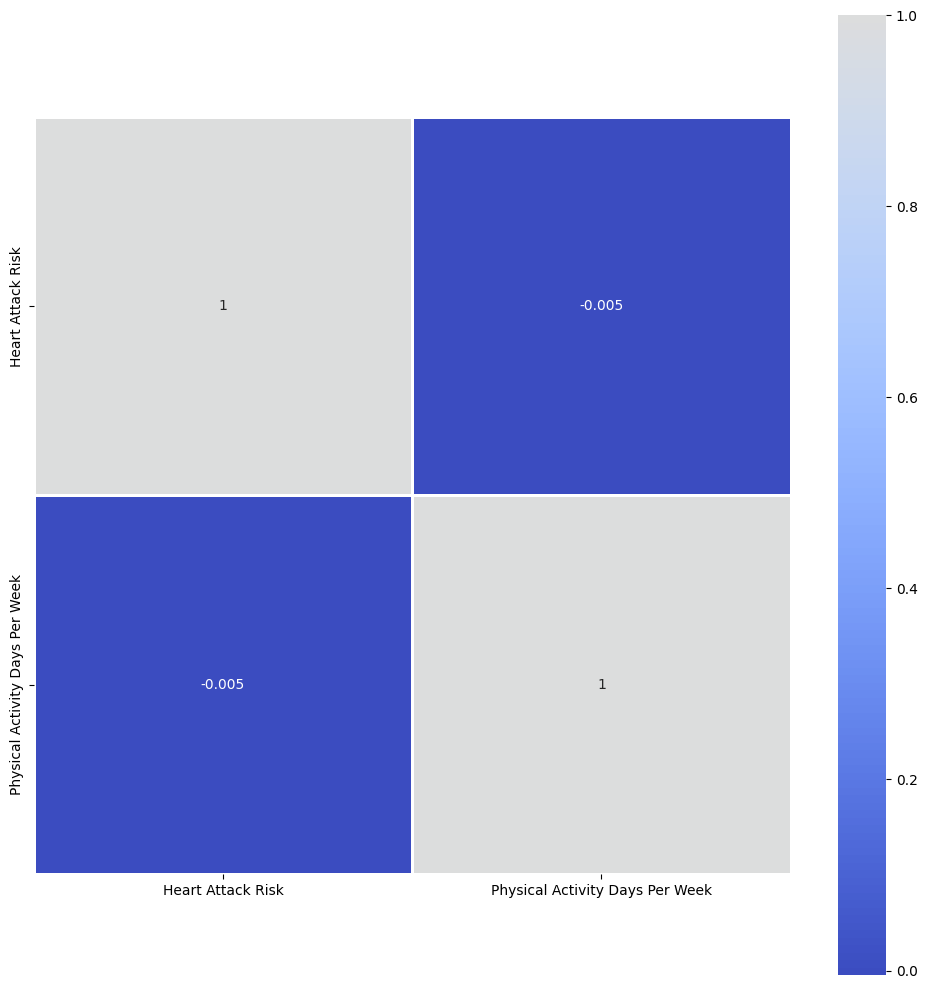

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor5,annot=True,cmap='coolwarm',linewidths=2,center=True,square=True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation with Heart Attack Risk')

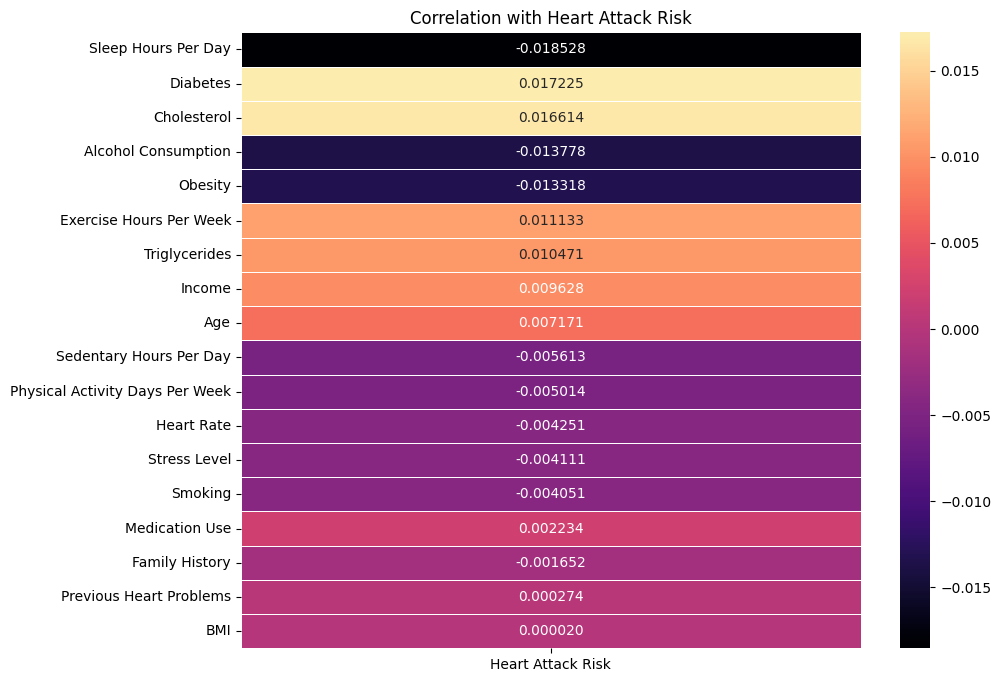

In [ ]:
numeric_columns = df2_new.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

# Calculate correlations between all variables and 'Heart Attack Risk'
corr_to_hrisk = correlation_matrix['Heart Attack Risk']

# Sort by magnitude(we care more about impact)
corr_to_hrisk = corr_to_hrisk.drop('Heart Attack Risk')  # Remove the correlation with itself
corr_to_hrisk = corr_to_hrisk.abs().sort_values(ascending=False)

# Create our color map for both positive and negative
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))

# Let's make our heatmap (sorted by absolute value)
sns.heatmap(correlation_matrix.loc[corr_to_hrisk.index, ['Heart Attack Risk']],annot=True,cmap="magma",fmt=".6f",center=0,linewidth=0.5)

plt.title('Correlation with Heart Attack Risk')

# misc graphs

## physical activity

In [ ]:
count_active_days = df2_new['Physical Activity Days Per Week'].value_counts().sort_index()

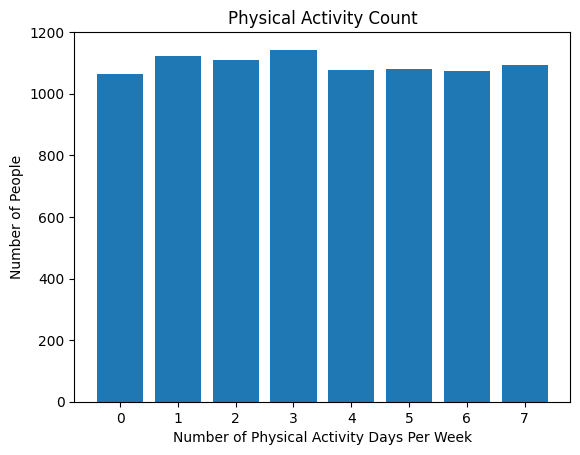

In [ ]:
plt.bar(count_active_days.index, count_active_days)
plt.title('Physical Activity Count')
plt.xlabel('Number of Physical Activity Days Per Week')
plt.ylabel('Number of People')
plt.show()

## sleep hours per day

In [ ]:
count_sleep = df2_new['Sleep Hours Per Day'].value_counts().sort_index()

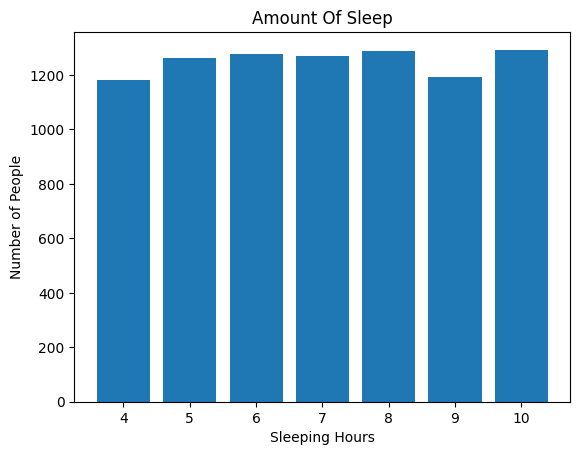

In [ ]:
plt.bar(count_sleep.index, count_sleep)
plt.title('Amount Of Sleep')
plt.xlabel('Sleeping Hours')
plt.ylabel('Number of People')
plt.show()

-> 7 or more hours of sleep is required for optimal health

## sedentary hours

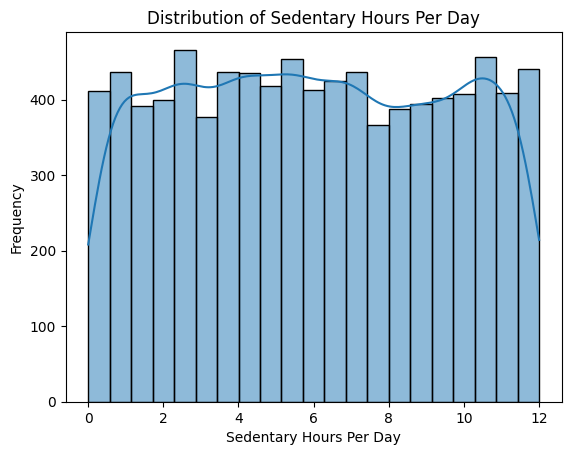

In [ ]:
import seaborn as sns

sns.histplot(data=df2_new, x='Sedentary Hours Per Day', kde=True) 
#kde -> kernel density estimation
plt.title('Distribution of Sedentary Hours Per Day')
plt.xlabel('Sedentary Hours Per Day')
plt.ylabel('Frequency')
plt.show()